# assignment_numpy

# Project: Image manipulation in Numpy

## Overview

In this exercise, you should look for an image that you will use to do some manipulations with. It is highly important that you do all your image manipulations using the raw image data in Numpy (and do not use the PIL object). You can find in the following location an example of a notebook where we used Numpy for image manipulation: 

`Dropbox/Syntra/slides/chapter09 Numpy/motiverend voorbeeld`

## Detailed assignment

**Assignment: Setting Up Project and Developing a Production Simulation Program**

In this assignment, you will follow a series of steps to set up a project structure, manage version control using Git, create a virtual environment with Anaconda, and develop a Python program for image manipulation

**Step 1: Initialize Git Repository**

Initialize a git repository on your personal GitHub account to track changes and collaborate effectively. You can add the data into this git repo.

**Step 2: Create Virtual Environment with Anaconda**

Utilize Anaconda to establish a virtual environment for your project. Ensure that you install only the necessary packages required for the project.

**Step 3: Choose & load image**

Choose an image that you want to do the manipulations for. Use the following code to read in this image and get the underlying numpy object.

In [15]:
# import packages
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
current_dir = os.getcwd()
current_dir

'D:\\DS_projects\\assignment_numpy\\notebooks'

In [17]:
# load image
image = Image.open('../data/input/gekkie.jpg')

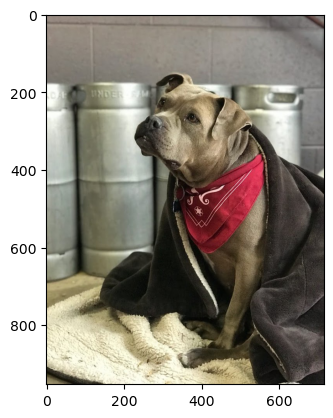

In [18]:
# convert image to numpy array and display
np_image = np.array(image)
plt.imshow(np_image)
plt.show()

**Step 4: Do my image manipulations**

Use Numpy to create all of the following manipulated versions of the original image:

<div style="text-align:center">
  <img src="../data/input/image_manip1.png" alt="Manip1">
</div>

<div style="text-align:center">
  <img src="../data/input/image_manip2.png" alt="Manip2">
</div>

<div style="text-align:center">
  <img src="../data/input//image_manip3.png" alt="Manip3">
</div>

#### Recreate first image

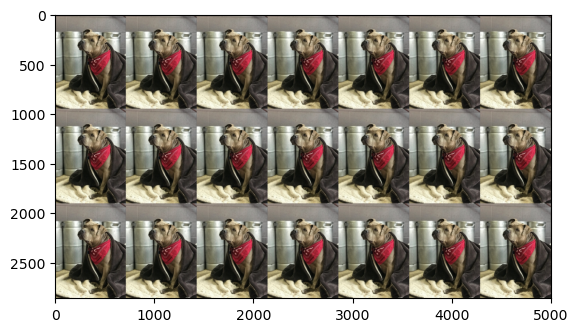

In [30]:
# create first image layout
row = np.concatenate(([np_image]*7), axis=1)
full_image = np.vstack([row]*3)
plt.imshow(full_image)
plt.show()

#### Recreate second image

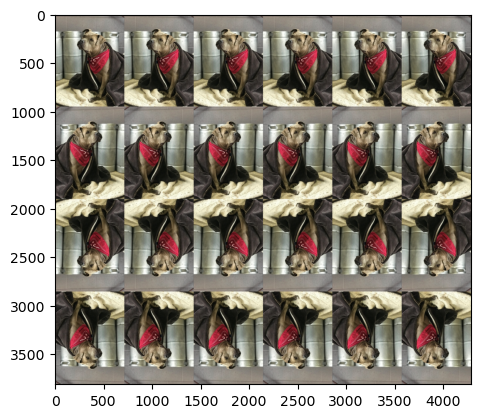

In [33]:
# Flip array to mirror the original
mirrored_image = np.flip(np_image, axis = 1)

# Flip rgb_array so that it is upside down
upside_down_image = np.flip(np_image, axis = 0)

# mirror the upside down image
upside_down_mirror_image = np.flip(np_image, axis = (0,1))

row1 = np.concatenate(([np_image]*6), axis=1)
row2 = np.concatenate(([mirrored_image]*6), axis=1)
row3 = np.concatenate(([upside_down_image]*6), axis=1)
row4 = np.concatenate(([upside_down_mirror_image]*6), axis=1)
full_image = np.vstack([row1, row2, row3, row4])
plt.imshow(full_image)
plt.show()

#### Recreate third image

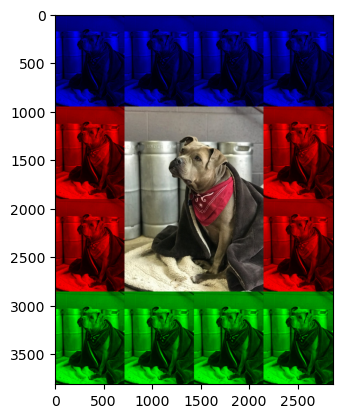

In [36]:
image_R = np_image.copy()
image_R[:, :, (1, 2)] = 0
image_G = np_image.copy()
image_G[:, :, (0, 2)] = 0
image_B = np_image.copy()
image_B[:, :, (0, 1)] = 0

bigger_image = np_image.repeat(2, axis=0).repeat(2, axis=1)

piece1 = bigger_image[:bigger_image.shape[0]//2, :bigger_image.shape[1]//2]
piece2 = bigger_image[:bigger_image.shape[0]//2, bigger_image.shape[1]//2:]
piece3 = bigger_image[bigger_image.shape[0]//2:, :bigger_image.shape[1]//2]
piece4 = bigger_image[bigger_image.shape[0]//2:, bigger_image.shape[1]//2:]

sliced_images = [piece1, piece2, piece3, piece4]
row_1 = np.hstack([image_B,image_B,image_B,image_B])
row_2 = np.hstack([image_R,piece1,piece2,image_R])
row_3 = np.hstack([image_R,piece3,piece4,image_R])
row_4 = np.hstack([image_G,image_G,image_G,image_G])
full_image = np.vstack([row_1, row_2, row_3, row_4])
plt.imshow(full_image)
plt.show()

**Step 5: Generalize these manipulations**
Generalize the image manipulations that you created in **Step 4**, generalize to the following (or even more general if you want):
 - Define a function `grid_with_flips(image, matrix)`, where `matrix` is a matrix containing the type of flips that you do with your image. You could say `0` for you image not flipped, `1` for flipping your image left right, `2` for flipping it upside down and `3` for flipping it both left right and upside down. For example the two images you created in **Step 4** would be the result of using the matrix: `[[1 for i in range(7)] for j in range(3)]` and `[[j for i in range(7)] for j in range(4)]`.
 - Define a function `create_colorful_big_one(colors)` where `colors` is a list of colors (starting left top and rotating clockwise). The image from `Step 4` is the result of calling the function `create_colorful_big_one(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'])`.

 Can you also think of a way in which you could combine these two functions to create a single function that allows you to create (a combination of) the above manipulations?

 ***Remark:*** While I talk about "a single function", it is *not* best practice to create one single function containing all code, but rather create many small functions which are all combined in other function(s). Each function should do one thing, and your final function should simply combine those functionalities based on your input.

Replace the code your wrote in **Step 4** by 3 simple function calls from the function(s) you defined in this step. Please also make sure to organize & document your code after completing this part.

In [38]:
def grid_with_flips(image, matrix):
    """
    Concatenates the given image horizontally multiple times based on the number of repeats and the flip matrix.

    Parameters:
    image (numpy.ndarray): The input image to be concatenated.
    matrix (list): The matrix specifying the type of flips to be performed on each image.

    Returns:
    numpy.ndarray: The concatenated image.

    Raises:
    ValueError: If an invalid flip matrix is provided.
    """

    flipped_images = []
    for row in matrix:
        flipped_row = []
        for flip_type in row:
            if flip_type == 1:
                flipped_image = np.flip(image, axis=1)
            elif flip_type == 2:
                flipped_image = np.flip(image, axis=(0, 1))
            elif flip_type == 3:
                flipped_image = np.flip(image, axis=0)
            elif flip_type != 0:
                raise ValueError("Invalid flip type. Please choose 0, 1, 2, or 3.")
            else:
                flipped_image = image
            flipped_row.append(flipped_image)
        flipped_images.append(flipped_row)

    joined_images = [np.concatenate(row, axis=1) for row in flipped_images]
    full_image = np.concatenate(joined_images, axis=0)

    return full_image

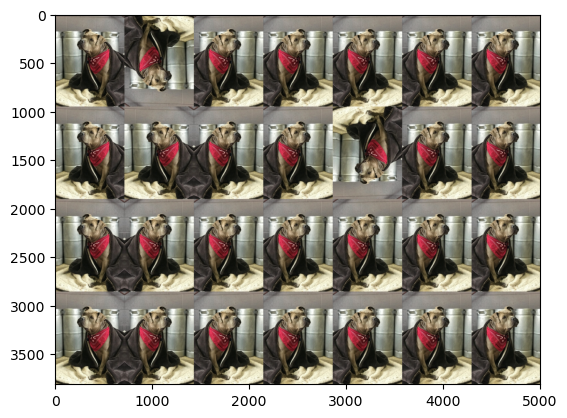

In [39]:
plt.imshow(grid_with_flips(np_image, [[0, 2, 1, 1, 1, 1, 1], [0, 0, 1, 1, 3, 1, 1], [0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1]]))
plt.show()

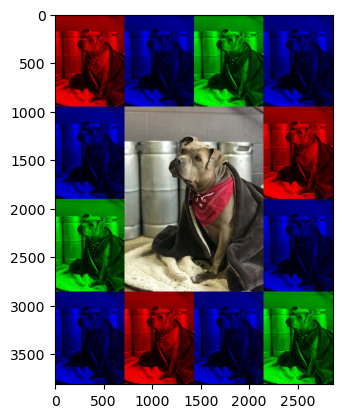

In [40]:
def create_colorful_big_one(matrix, np_image=np_image):
    """
    Creates an image from a matrix by mapping each element of the matrix to a corresponding image.

    Args:
        matrix (list): The matrix containing a list of colors starting left top and rotating clockwise.
        np_image (numpy.ndarray, optional): The original image as a numpy array. Defaults to np_image.

    Raises:
        ValueError: If an invalid color code is encountered.

    Returns:
        display: The final image created from the matrix.
    """

    # Define the middle matrix containing the sections of the middle image
    middle_matrix = ['p1','p2','p3','p4']

    # Rearrange the matrix elements to desired pattern
    new_matrix = matrix[:4] + [matrix[-1]] + middle_matrix[0:2] + [matrix[4]] + [matrix[-2]] + middle_matrix[2:4] + [matrix[5]] + matrix[6:10][::-1]

    # Reshape the matrix to a 4x4 matrix
    new_matrix = np.reshape(new_matrix, (4, 4)).tolist()

    # Create copies of the original image with specific color channels
    image_R = np_image.copy()
    image_R[:, :, (1, 2)] = 0
    image_G = np_image.copy()
    image_G[:, :, (0, 2)] = 0
    image_B = np_image.copy()
    image_B[:, :, (0, 1)] = 0

    # Resize original image and split into four pieces
    bigger_image = np_image.repeat(2, axis=0).repeat(2, axis=1)

    piece1 = bigger_image[:bigger_image.shape[0]//2, :bigger_image.shape[1]//2]
    piece2 = bigger_image[:bigger_image.shape[0]//2, bigger_image.shape[1]//2:]
    piece3 = bigger_image[bigger_image.shape[0]//2:, :bigger_image.shape[1]//2]
    piece4 = bigger_image[bigger_image.shape[0]//2:, bigger_image.shape[1]//2:]

    # Create a list to store the color images
    color_images = []
    for row in new_matrix:
        color_row = []
        for color in row:
            if color == 'r':	
                color_image = image_R.copy()
            elif color == 'b':
                color_image = image_B.copy()
            elif color == 'g':
                color_image = image_G.copy()
            elif color == 'p1':
                color_image = piece1.copy()
            elif color == 'p2':
                color_image = piece2.copy()
            elif color == 'p3':
                color_image = piece3.copy()
            elif color == 'p4':
                color_image = piece4.copy()
            else:
                raise ValueError("Invalid color. Please choose 'r', 'g' or 'b'.")
            color_row.append(color_image)            
        color_images.append(color_row)

    # Concatenate the color images to create the final image
    color_images = np.concatenate([np.concatenate(row, axis=1) for row in color_images], axis=0)

    # Display the final image
    plt.imshow(color_images)
    plt.show()

create_colorful_big_one(['r', 'b', 'g', 'b', 'r', 'b', 'g', 'b', 'r', 'b', 'g','b'])

**Step 6: Your own manipulations**

Choose 2 more ways in which you manipulate your image and implement them.

**Step 7: Share your solution**

Compose a *README.md* file to document and guide users through your project. Include clear instructions on setting up the project, and executing the simulation. Provide concise explanations of the project structure and include an environment *YAML* file that I can use to setup a virtual environment.

By completing these steps, you trained the following skills:
 - Create a well organized codebase that allows for collaboration.
 - Learn to work with Numpy array objects.
 - Creation of general functions that can perform custom manipulations.